In [68]:
# coding=utf-8
import requests
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jieba
import datetime
import time
import numpy as np

plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

df=pd.DataFrame(pd.read_csv('content.csv'))
df.head()

,Unnamed: 0,content,time
0,0,幸而大雾四起，隐匿了我对你的爱,1609146203884
1,1,小鲸，别唤了，就算你再替我招来多少云雾，她也不会从雾里走出来。,1609145818175
2,2,很喜欢导航的一句话 您已偏离路线 请重新规划路线 在合适位置掉头,1609145734238
3,3,互相喜欢这个事有些不容易,1609145635762
4,4,“这次，我站在雾里，连自己都看不清，原来执着太久的东西，本来就没有意义”,1609145581974


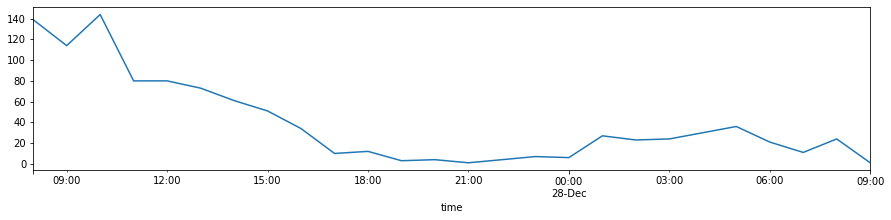

In [4]:
#对时间进行了分析（按小时聚合）
df['time'] = df['time'].map(lambda x: pd.Timestamp(x, unit="ms"))
daily=df
daily.index = pd.to_datetime(daily['time'])
daily=daily['content']
hour = daily.groupby(pd.Grouper(freq='H')).count()
ax = hour.plot(kind='line',figsize=(15,3))

In [47]:
#分词
import logging
import collections
logger = logging.getLogger(__name__)
#分词函数

def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()] #分别读取停用词表里的每一个词，
    return stopwords #返回一个列表，里面的元素是一个个的停用词

def jiebaword(text):

    # 加载停用词
    stoppath = 'cn_stopwords.txt'
    logger.info("加载停用词 %s " % stopwordslist(stoppath))


    # 分词
    logger.info("开始分词")
    data = [i for i in jieba.cut(text) if i not in stopwordslist(stoppath) and i != ' ' and i !="\n"]
    # 使用collections统计词频
    logger.info("转换成datafram")
    count_data = collections.Counter(list(data))
    # 将结果转成dataframe
    df = pd.DataFrame(count_data.items(), columns=['key', 'cnt'])

    return df

text=""
for i in df['content']:
    text+=i
#     list1=jieba.cut(i,cut_all=False)
#     print("/".join(list1))
df_jieba=jiebaword(text)

df_jieba=df_jieba.sort_values(by=['cnt'], ascending=False)
df_jieba.head()

,key,cnt
1,大雾,237
2,四起,134
11,喜欢,133
171,爱,115
37,会,90


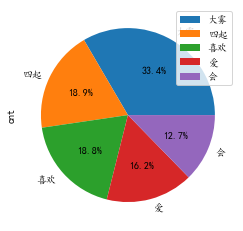

In [72]:
df_show=df_jieba[:5]
df_show1=df_show
df_show1.index=df_show['key']
df_show1=df_show1.drop(['key'],axis=1)
df_show1.plot.pie(subplots=True,autopct="%.1f%%")
plt.show()

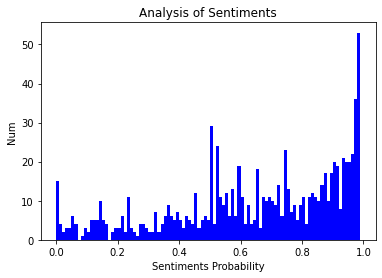

In [48]:
#每条评论情感分析
from snownlp import SnowNLP
sentimentslist = []
for i in df['content']:
    s = SnowNLP(i)
    #print(s.sentiments)
    sentimentslist.append(s.sentiments)
    
plt.hist(sentimentslist, bins = np.arange(0, 1, 0.01), facecolor = 'b')
plt.xlabel('Sentiments Probability')
plt.ylabel('Num')
plt.title('Analysis of Sentiments')
plt.show()

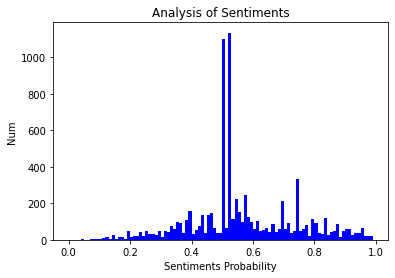

In [49]:
#用词方面
sentimentslist = []
for i,j in zip(df_jieba['key'],df_jieba['cnt']):
    s = SnowNLP(i)
    #print(s.sentiments)
    for item in range(j):
        sentimentslist.append(s.sentiments)
    
plt.hist(sentimentslist, bins = np.arange(0, 1, 0.01), facecolor = 'b')
plt.xlabel('Sentiments Probability')
plt.ylabel('Num')
plt.title('Analysis of Sentiments')
plt.show()